**Insights from Failed Orders**


This data project has been used as a take-home assignment in the recruitment process for the data science positions at Gett.

Gett, previously known as GetTaxi, is an Israeli-developed technology platform solely focused on corporate Ground Transportation Management (GTM). They have an application where clients can order taxis, and drivers can accept their rides (offers). At the moment, when the client clicks the Order button in the application, the matching system searches for the most relevant drivers and offers them the order. In this task, we would like to investigate some matching metrics for orders that did not completed successfully, i.e., the customer didn't end up getting a car.

*Assignment*

Please complete the following tasks.

1. Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?
2. Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?
3. Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?
4. Plot the distribution of average ETA by hours. How can this plot be explained?
5. BONUS Hexagons. Using the h3 and folium packages, calculate how many sizes 8 hexes contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.

*Data Description*

We have two data sets: data_orders and data_offers, both being stored in a CSV format. The data_orders data set contains the following columns:

- order_datetime - time of the order
- origin_longitude - longitude of the order
- origin_latitude - latitude of the order
- m_order_eta - time before order arrival
- order_gk - order number
- order_status_key - status, an enumeration consisting of the following mapping:
    4 - cancelled by client,
    9 - cancelled by system, i.e., a reject
- is_driver_assigned_key - whether a driver has been assigned
- cancellation_time_in_seconds - how many seconds passed before cancellation

The data_offers data set is a simple map with 2 columns:

- order_gk - order number, associated with the same column from the orders data set
- offer_id - ID of an offer

*Practicalities*

Make sure that the solution reflects your entire thought process including the preparation of data - it is more important how the code is structured rather than just the final result or plot.

In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [268]:
orders = pd.read_csv('datasets/data_orders.csv')
display(orders.head())
display(orders.info())
orders.describe()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


None

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021
std,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000


In [269]:
offers = pd.read_csv('datasets/data_offers.csv')
display(offers.head())
display(offers.info())
offers.describe()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


None

,order_gk,offer_id
count,3.343630e+05,3.343630e+05
mean,3.000602e+12,3.000515e+11
std,2.431638e+07,5.276821e+05
min,3.000551e+12,3.000506e+11
25%,3.000585e+12,3.000511e+11
50%,3.000596e+12,3.000516e+11
75%,3.000625e+12,3.000520e+11
max,3.000633e+12,3.000524e+11


1. Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

In [270]:
failure_groups = orders[['is_driver_assigned_key', 'order_status_key']].value_counts(normalize=True).reset_index()
failure_groups = failure_groups.replace({'is_driver_assigned_key':{0:'No', 1:'Yes'}, 'order_status_key':{4:'cancelled_by_client', 9:'cancelled_by_system'}})
failure_groups

,is_driver_assigned_key,order_status_key,proportion
0,No,cancelled_by_client,0.419560
1,No,cancelled_by_system,0.317842
2,Yes,cancelled_by_client,0.262318
3,Yes,cancelled_by_system,0.000280


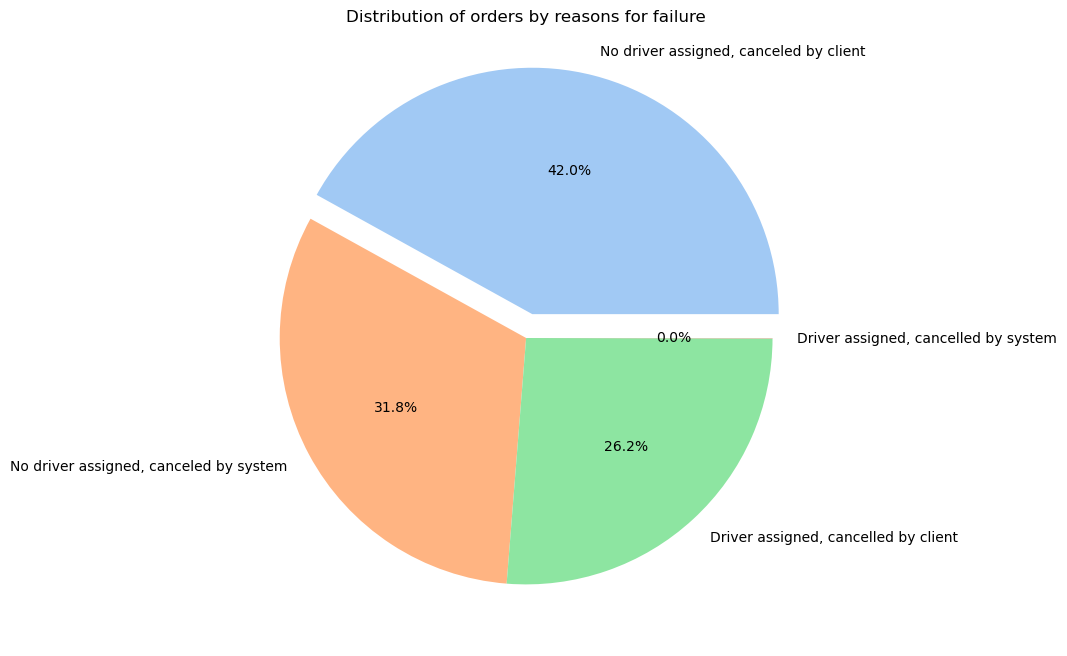

In [271]:
plt.figure(figsize=(10,8))
plt.pie(failure_groups['proportion'], 
    explode=(0.1, 0, 0, 0), 
    labels=['No driver assigned, canceled by client', 'No driver assigned, canceled by system', 'Driver assigned, cancelled by client', 'Driver assigned, cancelled by system'], 
    autopct='%1.1f%%', 
    colors=sns.color_palette('pastel'));
plt.title('Distribution of orders by reasons for failure');

2. Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

In [272]:
orders['order_datetime'] = pd.to_datetime(orders['order_datetime'], format='%H:%M:%S')
orders['order_datetime'].dtype

dtype('<M8[ns]')

In [273]:
failure_hours = orders['order_datetime'].dt.hour.value_counts(normalize=True).reset_index()
failure_hours

,order_datetime,proportion
0,8,0.100971
1,21,0.078947
2,23,0.078014
3,22,0.066816
4,0,0.063736
5,2,0.051792
6,17,0.050485
7,3,0.047872
8,1,0.043953
9,20,0.043766


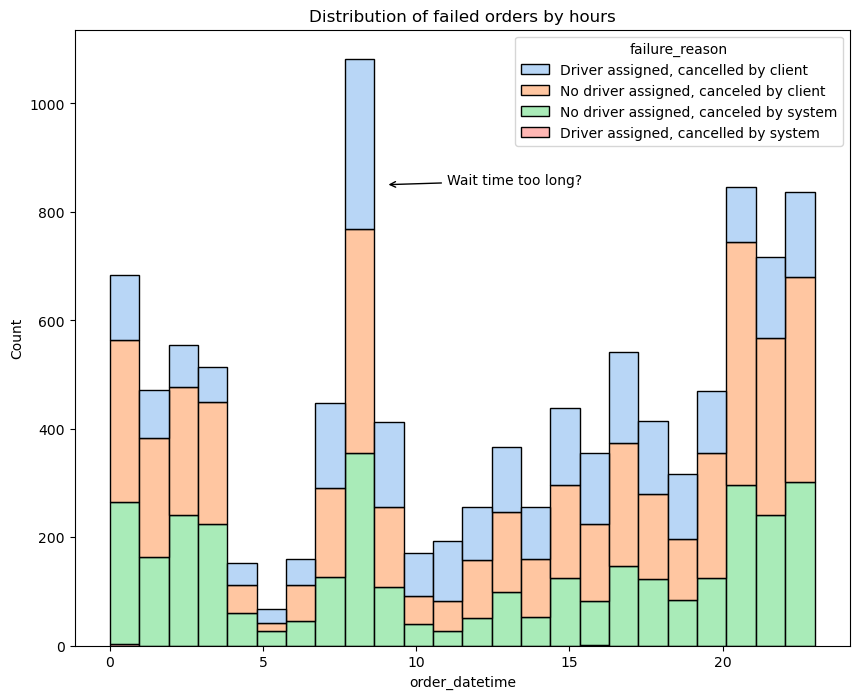

In [274]:
def failure_reason(x):
    if x == 4: return 'No driver assigned, canceled by client'
    elif x == 5: return 'Driver assigned, cancelled by client'
    elif x == 9: return 'No driver assigned, canceled by system'
    else: return 'Driver assigned, cancelled by system'

orders['failure_reason'] = (orders['is_driver_assigned_key'] + orders['order_status_key']).apply(lambda x: failure_reason(x))

plt.figure(figsize=(10,8))
sns.histplot(data=orders, x=orders['order_datetime'].dt.hour, bins=24, hue='failure_reason', multiple='stack', palette='pastel')
plt.title('Distribution of failed orders by hours')
plt.annotate('Wait time too long?', 
             xy=(9, 850), 
             xytext=(11, 850),
             arrowprops=dict(facecolor='black', arrowstyle='->'));

3. Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

count    7307.000000
mean      157.892021
std       213.366963
min         3.000000
25%        45.000000
50%        98.000000
75%       187.500000
max      4303.000000
Name: cancellations_time_in_seconds, dtype: float64


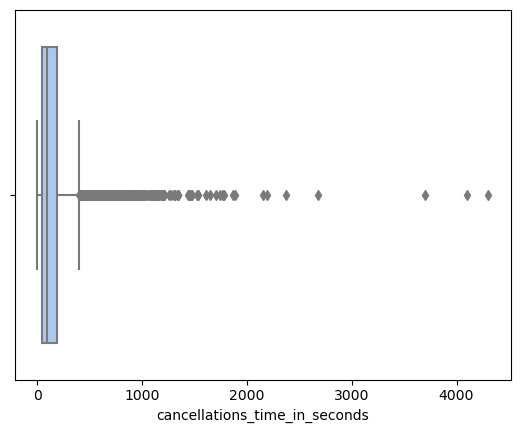

In [293]:
print(orders['cancellations_time_in_seconds'].describe())
sns.boxplot(data=orders, x='cancellations_time_in_seconds', palette='pastel');

In [280]:
Q1 = orders['cancellations_time_in_seconds'].quantile(0.25)
Q3 = orders['cancellations_time_in_seconds'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

orders_filtered = orders[(orders['cancellations_time_in_seconds'] >= lower_bound) & (orders['cancellations_time_in_seconds'] <= upper_bound)]

In [285]:
cancellation_hours = pd.pivot_table(orders_filtered, values='cancellations_time_in_seconds', aggfunc='mean', columns='is_driver_assigned_key', index=orders_filtered['order_datetime'].dt.hour)
cancellation_hours

is_driver_assigned_key,0,1
order_datetime,,
0,103.453925,146.131868
1,98.132420,132.985915
2,101.205128,140.527273
3,102.174888,115.326087
4,90.000000,121.125000
5,121.800000,100.368421
6,101.384615,89.675676
7,108.549383,122.962406
8,110.412346,127.540925


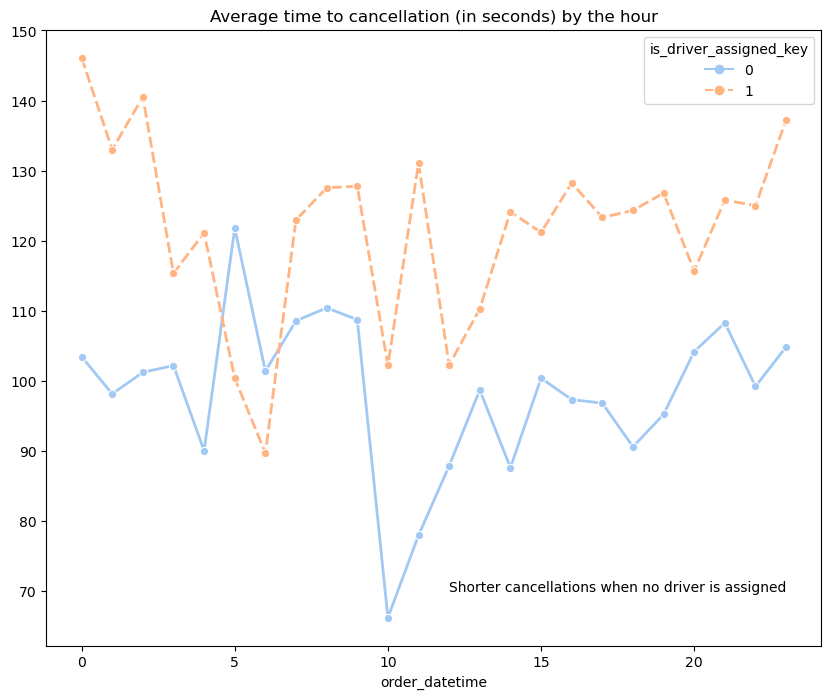

In [304]:
plt.figure(figsize=(10,8))
sns.lineplot(data=cancellation_hours, palette='pastel', linewidth=2, markers=['o', 'o'])
plt.title('Average time to cancellation (in seconds) by the hour')
plt.text(12, 70, 'Shorter cancellations when no driver is assigned');

4. Plot the distribution of average ETA by hours. How can this plot be explained?

In [307]:
avg_eta=orders.groupby(orders['order_datetime'].dt.hour)['m_order_eta'].mean().reset_index()
avg_eta

,order_datetime,m_order_eta
0,0,357.959016
1,1,324.750000
2,2,391.012821
3,3,388.093750
4,4,299.658537
5,5,411.120000
6,6,427.148936
7,7,583.358974
8,8,636.910828
9,9,504.891026


/var/folders/4k/dsnr88m12jbcywckjmnmnff40000gn/T/ipykernel_31662/2131217425.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=avg_eta, x='order_datetime', y='m_order_eta', palette='pastel', linewidth=2, markers='o')


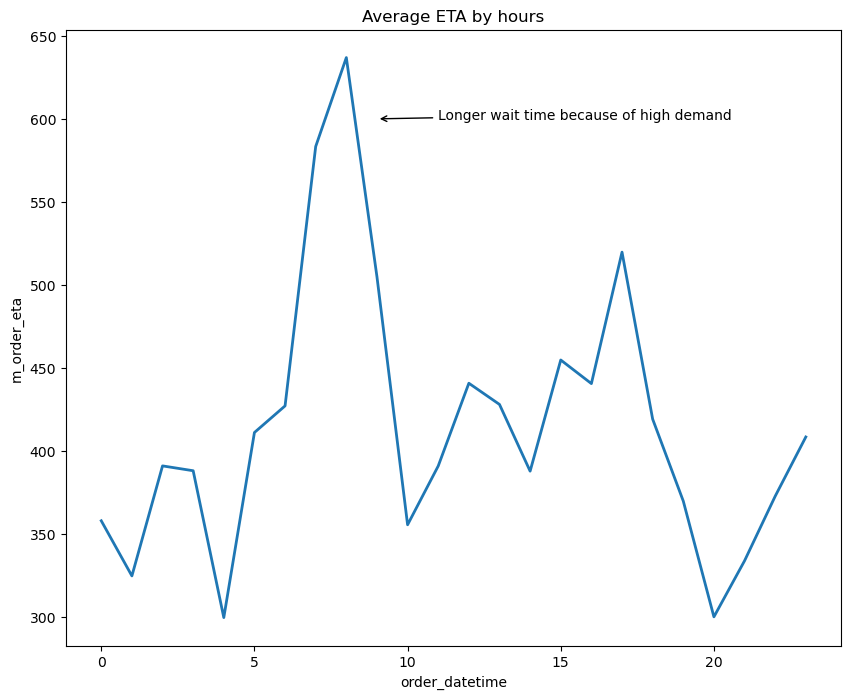

In [312]:
plt.figure(figsize=(10,8))
sns.lineplot(data=avg_eta, x='order_datetime', y='m_order_eta', palette='pastel', linewidth=2, markers='o')
plt.title('Average ETA by hours')
plt.annotate('Longer wait time because of high demand', 
             xy=(9, 600), 
             xytext=(11, 600),
             arrowprops=dict(facecolor='black', arrowstyle='->'));

5. BONUS Hexagons. Using the h3 and folium packages, calculate how many sizes 8 hexes contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.

In [328]:
import h3
import folium
from branca.colormap import LinearColormap

In [314]:
def compute_h3_and_boundaries(row, resolution=8):
    lat=row['origin_latitude']
    lng=row['origin_longitude']
    h3_index=h3.geo_to_h3(lat, lng, resolution)
    boundaries=h3.h3_to_geo_boundary(h3_index)
    return pd.Series([h3_index, boundaries])

In [315]:
orders[['h3_index', 'boundaries']] = orders.apply(compute_h3_and_boundaries, axis=1)
orders[['h3_index', 'boundaries']]

,h3_index,boundaries
0,88195d2b03fffff,"((51.4643389448808, -0.9797201234716127), (51...."
1,88195d2b19fffff,"((51.46032841933335, -0.9551211707321967), (51..."
2,88195d2b1dfffff,"((51.46233424112636, -0.9674195894273825), (51..."
3,88195d7497fffff,"((51.46283400323175, -1.0570473018561912), (51..."
4,88195d2b1dfffff,"((51.46233424112636, -0.9674195894273825), (51..."
...,...,...
10711,88195d2b03fffff,"((51.4643389448808, -0.9797201234716127), (51...."
10712,88195d2b03fffff,"((51.4643389448808, -0.9797201234716127), (51...."
10713,88195d2b1dfffff,"((51.46233424112636, -0.9674195894273825), (51..."
10714,88195d2b03fffff,"((51.4643389448808, -0.9797201234716127), (51...."


In [347]:
orders_hexes = orders.groupby('h3_index').size().reset_index(name='count').sort_values(by='count', ascending=False)
orders_hexes.head()

,h3_index,count
97,88195d2b1dfffff,1497
96,88195d2b1bfffff,870
93,88195d2b15fffff,774
91,88195d2b11fffff,707
95,88195d2b19fffff,667


In [348]:
orders_hexes['cumsum'] = orders_hexes['count'].sort_values(ascending=False).cumsum()
orders_hexes.head()

,h3_index,count,cumsum
97,88195d2b1dfffff,1497,1497
96,88195d2b1bfffff,870,2367
93,88195d2b15fffff,774,3141
91,88195d2b11fffff,707,3848
95,88195d2b19fffff,667,4515


In [349]:
orders_hexes = orders_hexes.loc[orders_hexes['cumsum'] <= 0.8*orders_hexes['count'].cumsum().max()].drop('cumsum', axis=1)
orders_hexes

,h3_index,count
97,88195d2b1dfffff,1497
96,88195d2b1bfffff,870
93,88195d2b15fffff,774
91,88195d2b11fffff,707
95,88195d2b19fffff,667
20,88195d284dfffff,653
63,88195d2a27fffff,414
89,88195d2b0bfffff,372
62,88195d2a25fffff,362
92,88195d2b13fffff,346


In [350]:
orders_hexes = orders_hexes.merge(orders[['h3_index', 'boundaries']].drop_duplicates(), 
    on='h3_index', how='left')
orders_hexes

,h3_index,count,boundaries
0,88195d2b1dfffff,1497,"((51.46233424112636, -0.9674195894273825), (51..."
1,88195d2b1bfffff,870,"((51.45257385379414, -0.9507230105639904), (51..."
2,88195d2b15fffff,774,"((51.45658471409391, -0.9753174349705782), (51..."
3,88195d2b11fffff,707,"((51.454579842735626, -0.9630191652468901), (5..."
4,88195d2b19fffff,667,"((51.46032841933335, -0.9551211707321967), (51..."
5,88195d284dfffff,653,"((51.44481886728639, -0.9463261989134449), (51..."
6,88195d2a27fffff,414,"((51.4505667478549, -0.9384289715086821), (51...."
7,88195d2b0bfffff,372,"((51.470088217811636, -0.9718213633595971), (5..."
8,88195d2a25fffff,362,"((51.45832148008727, -0.9428248679734373), (51..."
9,88195d2b13fffff,346,"((51.4468250230316, -0.9586200902493066), (51...."


In [351]:
lng=-0.978916	
lat=51.456173
m = folium.Map(location=[lat, lng], zoom_start=12)
colormap = LinearColormap(colors=['#ffcccc', '#ff0000'], vmin=orders_hexes['count'].min(), vmax=orders_hexes['count'].max())
for _, row in orders_hexes.iterrows():
    boundaries=row['boundaries']
    count=row['count']
    color=colormap(count)
    folium.Polygon(
        locations=boundaries,
        color=color,
        weight=1,
        fill=True,
        fill_opacity=0.6,
        popup=f'Count: {count}'
    ).add_to(m)
colormap.add_to(m)

m
